<a href="https://colab.research.google.com/github/nestrocuation/blahblah/blob/master/admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")
# Print first few elements.
print(data.head())

   test_scores    grades  accepted
0      0.78051 -0.063669         0
1      0.28774  0.291390         0
2      0.85176  0.661200         1
3      0.60436  0.866050         1
4      0.40714  0.178780         0


('Total number of records: ', 100)


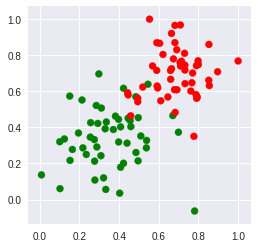

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# extract data frame columns into numpy array.
test_scores = data["test_scores"].values
grades = data["grades"].values
label = data["accepted"].values

# There's a total of 100 student records.
print("Total number of records: ", len(test_scores))

# plot the points.
# The green points indicates the students who are accepted.
# The red ones indicate the ones who are rejected.
colors = ['green','red']

fig = plt.figure(figsize=(4,4))
plt.scatter(test_scores, grades, c=label, cmap=matplotlib.colors.ListedColormap(colors))


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


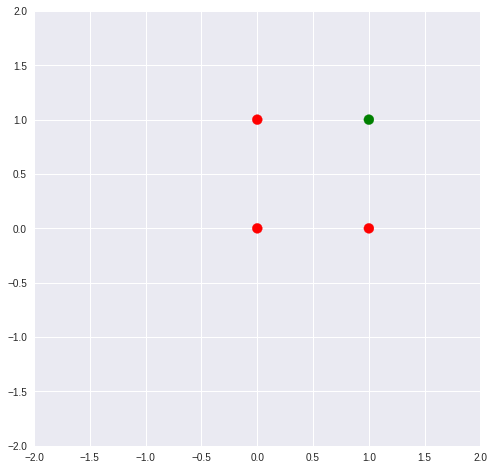

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Plotting the AND gate dataset.
and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])
colors = ['red','green']

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(and_gate_input_0, and_gate_input_1, c=and_gate_output, cmap=matplotlib.colors.ListedColormap(colors), s= 100)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
fig.show()

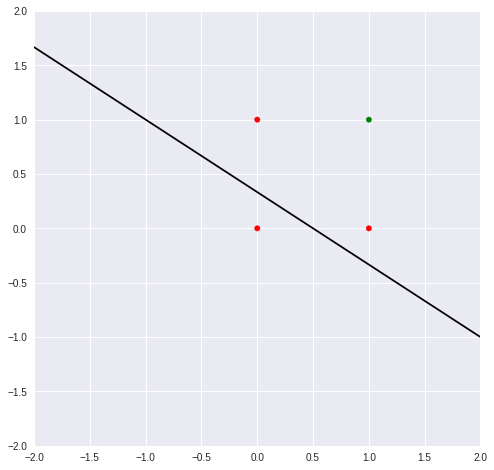

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Setting the values weights and bias.
w1 = 3
w2 = 2
b =  -1

# AND gate inputs
and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])
colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)

# Plot the AND gate data and the line.
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.scatter(and_gate_input_0, and_gate_input_1, c=and_gate_output, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')

fig.show()


In [ ]:
from collections import OrderedDict
import numpy as np
import pandas as pd

# Setting values for parameters weight1, weight2 and bias.
w1 = 3
w2 = 2
b =  -1


def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1,x2)
    prediction = find_output(score)
    return prediction


and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])

# Find the perceptron output for the AND gate dataset using the following parameters,
# w1 = 3, w2 = 2, b = -1.

prediction = []

# for all 4 samples in the AND dataset find the perceptron prediction.
for i in range(4):
    pred = find_perceptron_prediction(and_gate_input_0[i], and_gate_input_1[i])
    prediction.append(pred)

df= pd.DataFrame(OrderedDict( ( ('Input 0', pd.Series(and_gate_input_0)), ('Input 1', pd.Series(and_gate_input_1)),
                               ('Actual AND output', pd.Series(and_gate_output)), ('perceptron_prediction', pd.Series(prediction)))))

print(df)




   Input 0  Input 1  Actual AND output  perceptron_prediction
0        1        0                  0                      1
1        1        1                  1                      1
2        0        0                  0                      0
3        0        1                  0                      1


**With parameters set to values w1 = 1, w2 = 1 and b = -1.5 the perceptron model is able to separate the 2 classes of data and predict the output correctly too.**

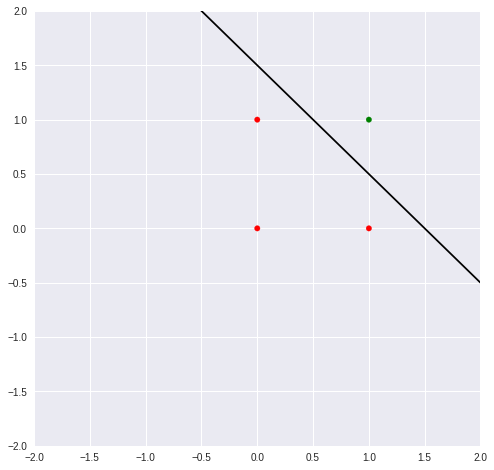

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Setting the values weights and bias.
w1 = 1
w2 = 1
b =  -1.5

# AND gate inputs
and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])
colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)

# Plot the AND gate data and the line.
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.scatter(and_gate_input_0, and_gate_input_1, c=and_gate_output, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')

fig.show()


**With parameters set to values w1 = 1, w2 = 1 and b = -1.5 the perceptron prediction matches the actual AND gate output.**

In [ ]:
from collections import OrderedDict
import numpy as np
import pandas as pd

# Setting values for parameters weight1, weight2 and bias.
w1 = 1
w2 = 1
b =  -1.5


def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1,x2)
    prediction = find_output(score)
    return prediction


and_gate_input_0 = np.array([1, 1, 0, 0])
and_gate_input_1 = np.array([0, 1, 0, 1])
# The output is 1 only in case where both the corresponding inputs are 1.
and_gate_output  = np.array([0, 1, 0, 0])

# Find the perceptron output for the AND gate dataset using the following parameters,
# w1 = 1, w2 = 1, b = -1.5.

prediction = []

# for all 4 samples in the AND dataset find the perceptron prediction.
for i in range(4):
    pred = find_perceptron_prediction(and_gate_input_0[i], and_gate_input_1[i])
    prediction.append(pred)

df= pd.DataFrame(OrderedDict( ( ('Input 0', pd.Series(and_gate_input_0)), ('Input 1', pd.Series(and_gate_input_1)),
                               ('Actual AND output', pd.Series(and_gate_output)), ('perceptron_prediction', pd.Series(prediction)))))

print(df)



   Input 0  Input 1  Actual AND output  perceptron_prediction
0        1        0                  0                      0
1        1        1                  1                      1
2        0        0                  0                      0
3        0        1                  0                      0


## Plot of straight line decision boundary based on parameter values w1 = 5, w2 = 3, b = -2

   test_scores    grades  accepted
0      0.78051 -0.063669         0
1      0.28774  0.291390         0
2      0.85176  0.661200         1
3      0.60436  0.866050         1
4      0.40714  0.178780         0


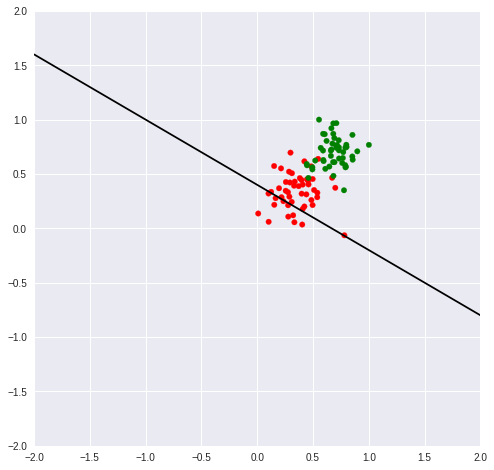

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setting the values weights and bias.
w1 = 5
w2 = 3
b =  -2


# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")
# Print first few elements.
print(data.head())

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)

# Plot the university acceptance data and the line.
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.scatter(test_scores, grades, c=accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')

fig.show()

## Plot of straight line decision boundary based on parameter values w1 = 1, w2 = 1, b = -1.4

   test_scores    grades  accepted
0      0.78051 -0.063669         0
1      0.28774  0.291390         0
2      0.85176  0.661200         1
3      0.60436  0.866050         1
4      0.40714  0.178780         0


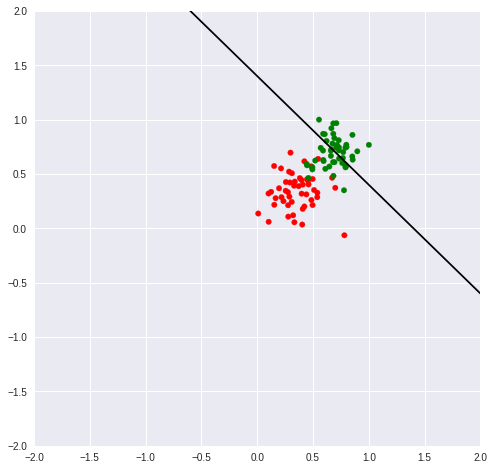

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setting the values weights and bias.
w1 = 1
w2 = 1
b =  -1.4


# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")
# Print first few elements.
print(data.head())

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)

# Plot the university acceptance data and the line.
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.scatter(test_scores, grades, c=accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')

fig.show()

## Calculating the number of misclassified points for parameters w1 = 1, w2 = 1, b = -1.4

Parameters: w1 = 1, w2 = 1, b = -1.4
('Total misclassified points: ', 24)


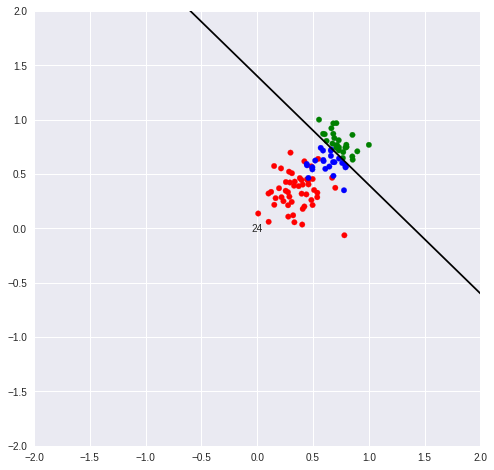

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict


# Setting the values weights and bias.
w1 = 1
w2 = 1
b =  -1.4


# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green','blue']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)




def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1,x2)
    prediction = find_output(score)
    return prediction


misclassified = 0
# Iterate through the records, make prediction and find the
# total number of misclassified points.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i])

    if pred != accepted[i]:
        misclassified = misclassified + 1
        accepted[i] = 2

print("Parameters: w1 = 1, w2 = 1, b = -1.4")
print('Total misclassified points: ', misclassified)


# Plot the university acceptance data and the line.
fig, ax = plt.subplots(figsize=(8,8))
plt.text(0.5, 0.5, str(misclassified),horizontalalignment = 'center',
         verticalalignment = 'center', transform = ax.transAxes)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

ax.scatter(test_scores, grades, c = accepted , cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')


fig.show()

## Calculating the number of misclassified points for parameters w1 = 5, w2 = 3, b = -2

Parameters: w1 = 5, w2 = 3, b = -2
('Total misclassified points: ', 39)


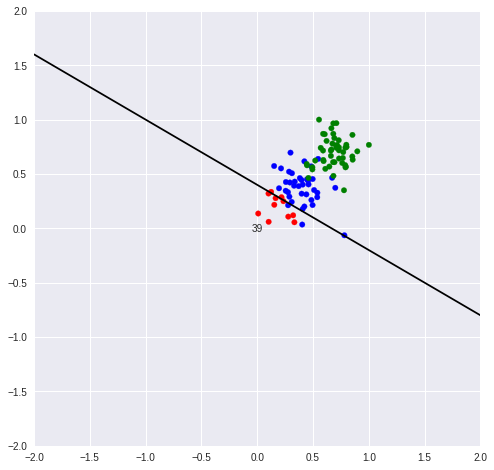

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict


# Setting the values weights and bias.
w1 = 5
w2 = 3
b =  -2


# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green','blue']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)




def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1,x2)
    prediction = find_output(score)
    return prediction


misclassified = 0


# Iterate through the records, make prediction and find the
# total number of misclassified points.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i])

    if pred != accepted[i]:
        misclassified = misclassified + 1
        accepted[i] = 2


print("Parameters: w1 = 5, w2 = 3, b = -2")
print("Total misclassified points: ", misclassified)


# Plot the university acceptance data and the line.
fig, ax = plt.subplots(figsize=(8,8))
plt.text(0.5, 0.5, str(misclassified),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

ax.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')


fig.show()

Parameters:     w1 = 1, w2 = 1, b = -1,2
Loss            0.2521047882636882
misclassified:  9


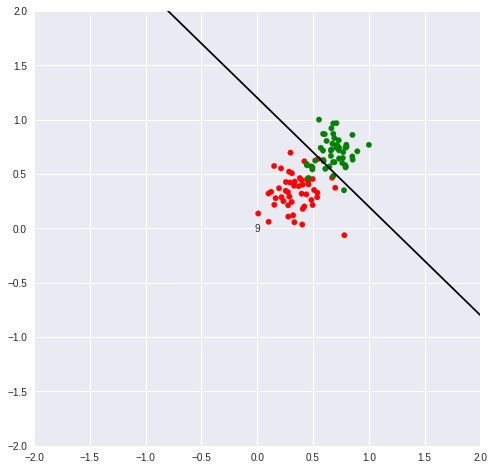

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict


# Setting the values weights and bias.
w1 = 1
w2 = 1
b =  -1.2


# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)




def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1,x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1, x2)
    prediction = find_output(score)
    return prediction


# total number of misclassified points.
misclassified = 0
# total number of records.
total_records = len(test_scores)
# cumulative loss.
loss = 0

# Iterate through all the records.
for i in range(total_records):
    # find the score and calculate the error.
    score = find_score(test_scores[i], grades[i])
    error = (1./2) * ((accepted[i] - score) ** 2)
    # Add the error to the cumulative loss.
    loss = loss + error
    # Make prediction.
    prediction = find_output(score)

    pred = find_perceptron_prediction(test_scores[i], grades[i])

    # Calclulate the total number of wrongly classified points.
    if pred != accepted[i]:
      misclassified = misclassified + 1


loss = loss / total_records


print "Parameters:     w1 = 1, w2 = 1, b = -1,2"
print "Loss           ", loss
print "misclassified: ", misclassified


# Plot the university acceptance data and the line.
fig, ax = plt.subplots(figsize=(8,8))
plt.text(0.5, 0.5, str(misclassified),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

ax.scatter(test_scores, grades, c=accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax.plot(x2, x1,   color='black')


fig.show()

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict


# Setting the values weights and bias.
w1 = 1
w2 = 0
b =  -1.2


# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)




def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, weight1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * weight1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1,x2, weight1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1, x2, weight1)
    prediction = find_output(score)
    return prediction


def find_loss(weight1=w1, w2=w2, b=b):
  # total number of misclassified points.
  misclassified = 0
  # total number of records.
  total_records = len(test_scores)
  # cumulative loss.
  loss = 0

  # Iterate through all the records.
  for i in range(total_records):
      # find the score and calculate the error.
      score = find_score(test_scores[i], grades[i], weight1)
      error = (1./2) * ((accepted[i] - score) ** 2)
      # Add the error to the cumulative loss.
      loss = loss + error
      # Make prediction.
      prediction = find_output(score)

      pred = find_perceptron_prediction(test_scores[i], grades[i], weight1)

      # Calclulate the total number of wrongly classified points.
      if pred != accepted[i]:
        misclassified = misclassified + 1
  """
  print "Parameters:     (w1, w2, b) ", (weight1, w2, b)
  print "Loss           ", loss
  print "misclassified: ", misclassified
  """
  loss = loss / total_records
  return loss, misclassified

w1_set =  generate_spaced_points(6, -1, 50)
losses = []
wrongly_classifieds = []

for i in range(len(w1_set)):
  loss, misclassified = find_loss(w1_set[i])

  losses.append(loss)
  wrongly_classifieds.append(misclassified)



df = pd.DataFrame(OrderedDict( ( ('Weight 1', pd.Series(w1_set)), ('Misclassfied', pd.Series(wrongly_classifieds)),
                               ('Loss', pd.Series(losses)))))

print(df)



    Weight 1  Misclassfied      Loss
0   6.000000            42  1.478910
1   5.857143            42  1.348238
2   5.714286            42  1.224046
3   5.571429            41  1.106333
4   5.428571            40  0.995101
5   5.285714            40  0.890349
6   5.142857            40  0.792077
7   5.000000            39  0.700286
8   4.857143            39  0.614974
9   4.714286            39  0.536142
10  4.571429            37  0.463790
11  4.428571            37  0.397919
12  4.285714            34  0.338527
13  4.142857            32  0.285615
14  4.000000            30  0.239184
15  3.857143            28  0.199232
16  3.714286            27  0.165761
17  3.571429            24  0.138769
18  3.428571            24  0.118258
19  3.285714            24  0.104227
20  3.142857            22  0.096675
21  3.000000            20  0.095604
22  2.857143            17  0.101013
23  2.714286            14  0.112902
24  2.571429            14  0.131271
25  2.428571            14  0.156120
2

## Case 1: When lot of red points are misclassified.

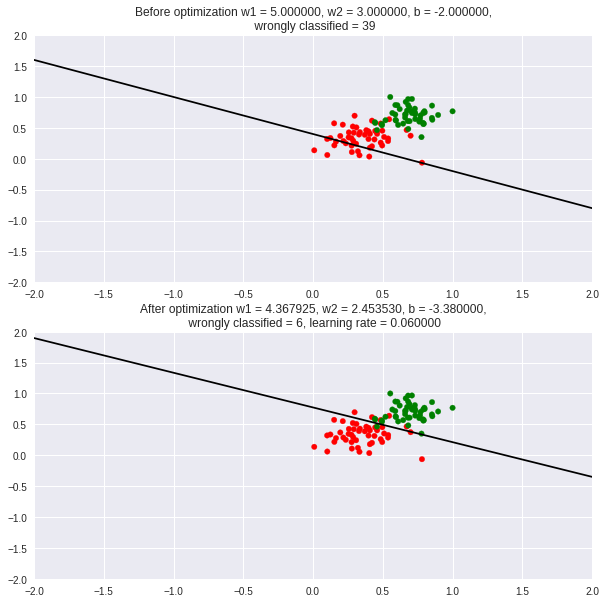

In [ ]:
  %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict


# Setting the values weights and bias.
w1 = 5
w2 = 3
b =  -2
# Setting the learning rate.
# Experiment with different values of learning rate.
learning_rate = 0.06

# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)



def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1, x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1, x2, w1, w2, b)
    prediction = find_output(score)
    return prediction


misclassified = 0

def parameter_optimize(x1, x2, y, w1=w1,w2=w2, b=b, learning_rate = learning_rate):
    # X contains the 100 student records.
    # Iterate through each record.
    for i in range(len(x1)):
        # Make prediction using the initial values of W[0], W[1], b.
        y_hat = find_perceptron_prediction(x1[i], x2[i], w1, w2, b)
        # Case where the red points are wrongly classified.
        # This is the case where the actual output is 0 but the prediction is 1.
        if y[i] != y_hat and y[i] == 0:
            w1 = w1 - test_scores[i] * learning_rate
            w2 = w2 - grades[i] * learning_rate
            b = b - learning_rate
    return w1, w2, b

# Iterate through the records, make prediction and find the
# total number of misclassified points.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i])

    if pred != accepted[i]:
        misclassified = misclassified + 1



# Now optimize the parameters.
new_w1, new_w2, new_b = parameter_optimize(test_scores, grades, accepted)
new_misclassified = 0

# Make the prediction with new optimized values of parameters
# With these new optimized values the classifier is expected to perform better.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i], new_w1, new_w2, new_b )

    if pred != accepted[i]:
        new_misclassified = new_misclassified + 1


# Plot the classifier's prediction before and after the prediction.
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

title_1 = "Before optimization w1 = %f, w2 = %f, b = %f,\n wrongly classified = %d" % (w1, w2, b, misclassified)
ax1.set_title(title_1)
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])

ax1.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax1.plot(x2, x1,   color='black')


title_2 = "After optimization w1 = %f, w2 = %f, b = %f,\n wrongly classified = %d, learning rate = %f" % (new_w1, new_w2, new_b, new_misclassified, learning_rate)
ax2.set_title(title_2)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])

x1_new = get_x1_line_points(x2, new_w1, new_w2, new_b)
ax2.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax2.plot(x2, x1_new,   color='black')


fig.show()

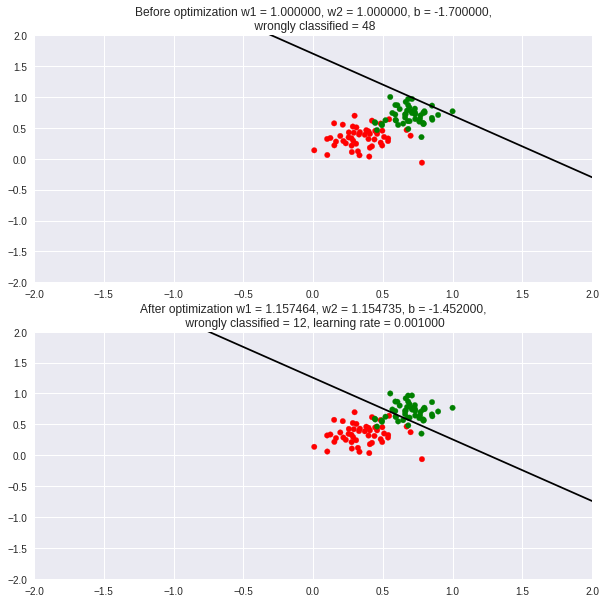

9


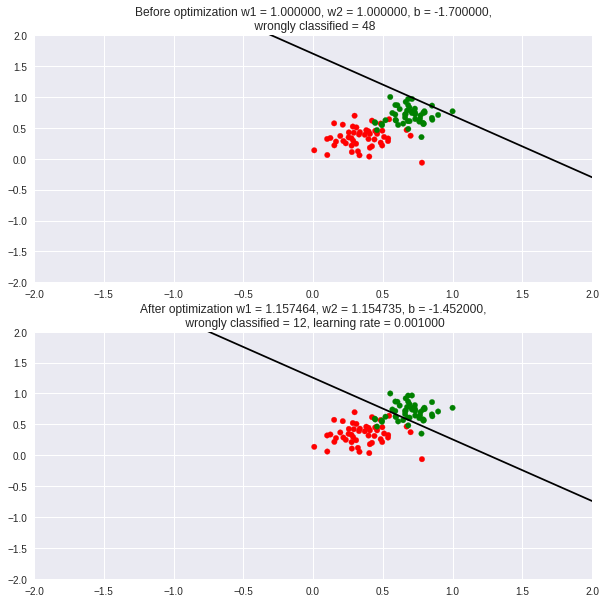

In [ ]:
  %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
from IPython import display
import time


# Setting the values weights and bias.
w1 = 1
w2 = 1
b =  -1.7
# Setting the learning rate.
# Experiment with different values of learning rate.
learning_rate = 0.001
number_of_iterations_of_training = 10

# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)



def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1, x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1, x2, w1, w2, b)
    prediction = find_output(score)
    return prediction


misclassified = 0

def parameter_optimize(x1, x2, y, w1=w1,w2=w2, b=b, learning_rate = learning_rate):
    # X contains the 100 student records.
    # Iterate through each record.
    for i in range(len(x1)):
        # Make prediction using the initial values of W[0], W[1], b.
        y_hat = find_perceptron_prediction(x1[i], x2[i], w1, w2, b)
        # Case where the green points are wrongly classified.
        # This is the case where the actual output is 0 but the prediction is 1.
        if y[i] != y_hat and y[i] == 1:
            w1 = w1 + test_scores[i] * learning_rate
            w2 = w2 + grades[i] * learning_rate
            b = b + learning_rate
    return w1, w2, b

# Iterate through the records, make prediction and find the
# total number of misclassified points.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i])

    if pred != accepted[i]:
        misclassified = misclassified + 1

# Plot the classifier's prediction before and after the prediction.
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

title_1 = "Before optimization w1 = %f, w2 = %f, b = %f,\n wrongly classified = %d" % (w1, w2, b, misclassified)
ax1.set_title(title_1)
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])

ax1.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax1.plot(x2, x1,   color='black')

new_w1 = w1
new_w2 = w2
new_b  = b

time.sleep(1)


# Now optimize the parameters.
# Running the parameters optimization for 10 iterations.
for i in range(number_of_iterations_of_training):
    new_w1, new_w2, new_b = parameter_optimize(test_scores, grades, accepted, new_w1, new_w2, new_b)
    new_misclassified = 0

  # Make the prediction with new optimized values of parameters
  # With these new optimized values the classifier is expected to perform better.
    for j in range(len(test_scores)):
        pred = find_perceptron_prediction(test_scores[j], grades[j], new_w1, new_w2, new_b )

        if pred != accepted[j]:
           new_misclassified = new_misclassified + 1


    try:
        # Rendering the plot freshly after each iteration of training.
        title_2 = "After optimization w1 = %f, w2 = %f, b = %f,\n wrongly classified = %d, learning rate = %f" % (new_w1, new_w2, new_b, new_misclassified, learning_rate)
        ax2.set_title(title_2)
        ax2.set_xlim([-2, 2])
        ax2.set_ylim([-2, 2])
        # Obtain the straight line points for newly optimized parameters.
        x1_new = get_x1_line_points(x2, new_w1, new_w2, new_b)
        ax2.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
        ax2.plot(x2, x1_new,   color='black')

        display.display(plt.gcf())
        time.sleep(2)
        print(i)
        if i != 9:
          display.clear_output(wait=True)
          ax2.clear()

    except KeyboardInterrupt:
        break









/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


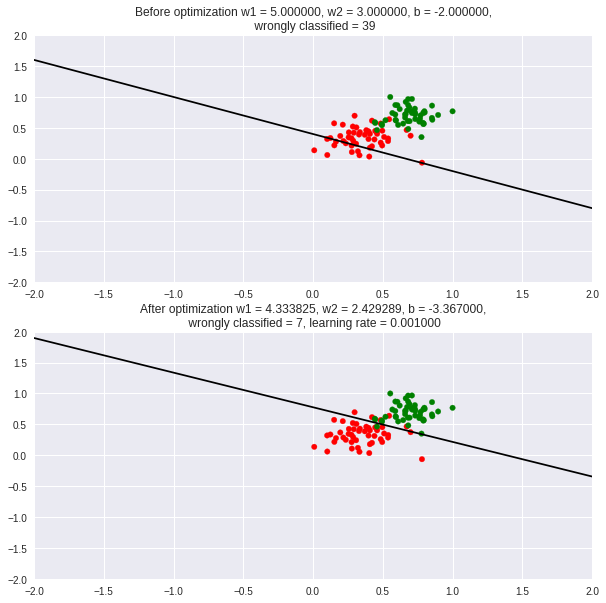

In [ ]:
  %matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict


# Setting the values weights and bias.
w1 = 5
w2 = 3
b =  -2
# Setting the learning rate.
# Experiment with different values of learning rate.
learning_rate = 0.001

# read the data file.
data = pd.read_csv("https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%201/code/admission_data.csv")

# extract data frame columns into numpy array.

# test scores (x1)
test_scores = data["test_scores"].values
# grades (x2)
grades = data["grades"].values
# accepted or not (y)
accepted = data["accepted"].values

colors = ['red','green']

def get_x1_line_points(x2, w1=w1, w2=w2, b=b):
    """
    our line is represented by w1 * x1 + w2 * x2 + b = 0
    To draw the line we need to find the points on the line and join them.
    Given a list of x2 values we can rfind corresponding x1 points using the
    following derivation.
    x1 = (-1 / w1) ( w2 * x2 +  b )
    """
    x1 =  (-1.0 / w1) * (w2 * x2 + b)
    return x1


def generate_spaced_points(minimum, maximum, total_points):
    """
    generate total_points number of equally spaced points between minimum and maximum
    """
    return np.linspace(minimum, maximum, num=total_points)

n = 50

# generate 20 equally spaced points between - 2 and 2.
# These will be the values for x2.
x2 = generate_spaced_points(-2 , 2, 20)
# Find the x1 values on the line for the supplied x2 points.
x1 = get_x1_line_points(x2)



def find_output(score):
    """
    The perceptron output is
      1 if score >= 0
      0 if score < 0
    """
    if score >= 0:
        return 1

    return 0

def find_score(x1, x2, w1=w1, w2=w2, b=b):
    """
    The perceptron score is calculated by
    score = x1 * w1 + x2 * w2 + b
    """

    score = x1 * w1 + x2 * w2 + b
    return score


def find_perceptron_prediction(x1, x2, w1=w1,w2=w2, b=b):
    """
    1. Find the score
    2. Find the perceptron prediction.

    """
    score = find_score(x1, x2, w1, w2, b)
    prediction = find_output(score)
    return prediction




def parameter_optimize(x1, x2, y, w1=w1,w2=w2, b=b, learning_rate = learning_rate):
    # X contains the 100 student records.
    # Iterate through each record.
    for i in range(len(x1)):
        # Make prediction using the initial values of W[0], W[1], b.
        y_hat = find_perceptron_prediction(x1[i], x2[i], w1, w2, b)
        # Case where the red points are wrongly classified.
        # This is the case where the actual output is 0 but the prediction is 1.
        if y[i] != y_hat and y[i] == 0:
            w1 = w1 - test_scores[i] * learning_rate
            w2 = w2 - grades[i] * learning_rate
            b  = b - learning_rate
        # Case where the green points are wrongly classified.
        # This is the case where the actual output is 0 but the prediction is 1.
        if y[i] != y_hat and y[i] == 1:
            w1 = w1 + test_scores[i] * learning_rate
            w2 = w2 + grades[i] * learning_rate
            b = b + learning_rate
    return w1, w2, b

misclassified = 0

# Iterate through the records, make prediction and find the
# total number of misclassified points.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i])

    if pred != accepted[i]:
        misclassified = misclassified + 1

# making a copy of the initial parameters so that they don't get altered during the training.
new_w1, new_w2, new_b = w1, w2, b


# Running 100 iterations of the training.
for i in range(100):

    # Now optimize the parameters.
    new_w1, new_w2, new_b = parameter_optimize(test_scores, grades, accepted, new_w1, new_w2, new_b)



new_misclassified = 0
# Make the prediction with new optimized values of parameters
# With these new optimized values the classifier is expected to perform better.
for i in range(len(test_scores)):
    pred = find_perceptron_prediction(test_scores[i], grades[i], new_w1, new_w2, new_b )

    if pred != accepted[i]:
        new_misclassified = new_misclassified + 1


# Plot the classifier's prediction before and after the prediction.
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

title_1 = "Before optimization w1 = %f, w2 = %f, b = %f,\n wrongly classified = %d" % (w1, w2, b, misclassified)
ax1.set_title(title_1)
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])

ax1.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax1.plot(x2, x1,   color='black')


title_2 = "After optimization w1 = %f, w2 = %f, b = %f,\n wrongly classified = %d, learning rate = %f" % (new_w1, new_w2, new_b, new_misclassified, learning_rate)
ax2.set_title(title_2)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])

x1_new = get_x1_line_points(x2, new_w1, new_w2, new_b)
ax2.scatter(test_scores, grades, c = accepted, cmap=matplotlib.colors.ListedColormap(colors), s= 30)
ax2.plot(x2, x1_new,   color='black')


fig.show()